In [39]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np

In [40]:
# Following Four cells shows how an intruder Eve and her measurement disturbs the outcome and it is possible
# to detect eves presence by looking and comparing a subset of bits at Alice and Bob. 
qc = QuantumCircuit(1,1)
# Alice prepares a Diagonaly polarized photon encoded in +45D (a qubit in state |+>)
qc.h(0)
qc.barrier()
# Alice  sends this photon (qubit) to Bob who measures it in the X-basis
qc.h(0)
qc.measure(0,0)
# Draw and simulate circuit
qc.draw()


┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

 No intruder results 100% Match


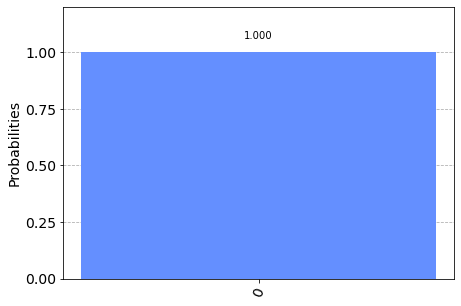

In [41]:
aer_sim = Aer.get_backend('qasm_simulator')
job = aer_sim.run(assemble(qc))
print(" No intruder results 100% Match")
plot_histogram(job.result().get_counts())

In [42]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
# Alice now sends the qubit to Bob
# but Eve intercepts and tries to read it
qc.measure(0, 0)
qc.barrier()
# Eve then passes this on to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)


┌───┐┌─┐ ░ ┌───┐┌─┐
q_0: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

Results with Intruder Eve making measurement in between


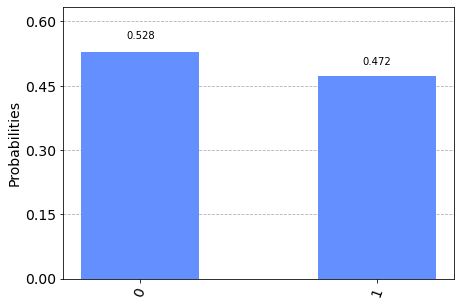

In [44]:
# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('qasm_simulator')
job = aer_sim.run(assemble(qc))
print("Results with Intruder Eve making measurement in between")
plot_histogram(job.result().get_counts())

In [45]:
# let's define photon polarization with Qubits, Horizontal polarization is encoded with state |0> and Vertical is encoded with state |1> on Z basis
# Diagonal polarization (+45D) is encoded with state |+> and -45D is encoded with state |-> on X basis

# Alice chooses a random bit string (information she intend to use in Secure Key) and a Random choice of Basis 
# (Z and X), this infomration remain private to her.
n = 500
np.random.seed(seed=0)
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
print(alice_bits)
print(alice_bases)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1
 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0
 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 0 0 0 0 1 1 1 1 1 

In [48]:
def encode_message_BB84(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Rectilinear/Z-basis
            if bits[i] == 0:   # bit[i] is 0, then let photon horizontally polarized, qubit state = |0>
                pass 
            else:
                qc.x(0)        # bit[i] is 1, then change, photon's polarization to vertical, qubit = |1>
        else: # Prepare qubit in Diagonal/X-basis
            if bits[i] == 0:   # bit[i] is 0, then photon should be +45 polarized, qubit state = |+>
                qc.h(0)
            else:              # bit[i] is 1, then photon should be -45 polarized, qubit state = |->
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [49]:
message = encode_message_BB84(alice_bits, alice_bases)

In [50]:
# just to check the encoded message bits
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])
message[0].draw()


bit = 0
basis = 1


┌───┐ ░ 
q_0: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════

In [51]:
# Assume our quantum information has travelled to other end, now Bob has
# to chose the Random Bases t measure each photon send by Alice and travlled thru channel
bob_bases = randint(2, size=n)
print(bob_bases)

[1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0
 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0
 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1
 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0
 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1
 1 1 1 1 0 1 0 0 1 0 0 1 

In [52]:
def measure_message_BB84(message, bases):
    backend = Aer.get_backend('qasm_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in R/Z-basis
            message[q].measure(0, 0)
        if bases[q] == 1: # measuring in D/X-basis
            message[q].h(0)
            message[q].measure(0, 0)
        aer_sim = Aer.get_backend('qasm_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [53]:
bob_results = measure_message_BB84(message, bob_bases)

C:\Users\jparasha\Anaconda3\lib\site-packages\qiskit\providers\aer\backends\aerbackend.py:87: DeprecationWarning: The BaseBackend abstract interface is deprecated as of the 0.18.0 release and will be removed in a future release. Instead you should build your backends using the BackendV1 abstract class (which is the current latest version of the backend interface)
  super().__init__(configuration, provider=provider)
C:\Users\jparasha\Anaconda3\lib\site-packages\qiskit\providers\aer\aerjob.py:56: DeprecationWarning: The BaseJob abstract interface is deprecated as of the 0.18.0 release and will be removed in a future release. Instead you should build your backends using the JobV1 abstract class (which is the current latest version of the backend interface)
  super().__init__(backend, job_id)


In [55]:
# check how process looks like for couple of bits coded as Qubits in entire flow.
message[0].draw()

┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

In [56]:
message[6].draw()

┌───┐┌───┐ ░ ┌───┐┌─┐
q_0: ┤ X ├┤ H ├─░─┤ H ├┤M├
     └───┘└───┘ ░ └───┘└╥┘
c: 1/═══════════════════╩═
                        0

In [57]:
print(bob_results) # results private to bob

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 

In [58]:
def get_good_bits(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

In [62]:
alice_key = get_good_bits(alice_bases, bob_bases, alice_bits)
print(alice_key)
bob_key = get_good_bits(alice_bases, bob_bases, bob_results)
print(bob_key)
print (" No of good bits ", len(bob_key))

[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [63]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the bit we sample is always in the  range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the list at index 'i'
        sample.append(bits.pop(i))
    return sample

In [64]:
# Take a sample from bits that has macthed the bases 
sample_size = 50
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
alice_sample = [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [65]:
# print alice and bob's key to see the match
print(bob_key)
print(alice_key)
print("key length = %i" % len(alice_key))

[0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0]
[0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,

In [66]:
# Run entire program at once
np.random.seed(seed=3)
# Step 1  prepare random bits
alice_bits = randint(2, size=n)
# Step 2 prepare random bases
alice_bases = randint(2, size=n)
message = encode_message_BB84(alice_bits, alice_bases)
## Interception!! optional, comment below two statements to remove Eve's presence
eve_bases = randint(2, size=n)
intercepted_message = measure_message_BB84(message, eve_bases)
## Step 3 Let bob generate Random Bases
bob_bases = randint(2, size=n)
bob_results = measure_message_BB84(message, bob_bases)
## Step 4 
bob_key = get_good_bits(alice_bases, bob_bases, bob_results)
alice_key = get_good_bits(alice_bases, bob_bases, alice_bits)
## Step 5
sample_size = 50
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1]
alice_sample = [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1]


In [69]:
# check if sample bits from Alice and Bob's key are matching ?
bob_sample == alice_sample

False

In [70]:
# chances of detection of the presence of Eve if 1 bit  is compared = 0.5 * 0.5 = 0.25
# chances of NOT detection of the presence of Eve if 1 bit is compared  = 1 - 0.25 = 0.75
# chances of detection of the presence of Eve if N bit from key are compared  = 1 - (0.75)^N 

print(1 - (0.75)**sample_size)

0.9999994336783435


In [71]:
# End of BB84 Protocol program using qiskit